w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

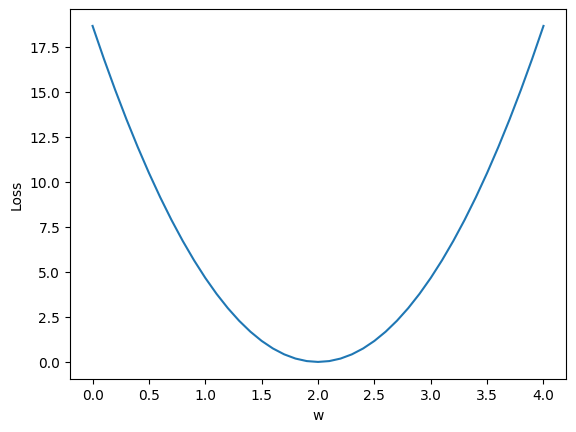

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
 
def forward(x):
    return x*w
 
 
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2
 
 
# 穷举法
w_list = []
mse_list = []
for w in np.arange(0.0, 4.1, 0.1):
    print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val, y_val)
        l_sum += loss_val
        print('\t', x_val, y_val, y_pred_val, loss_val)
    print('MSE=', l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)
    
plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()    

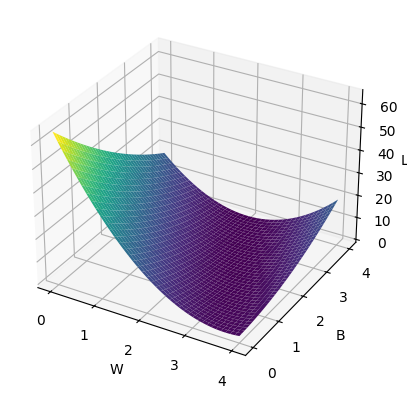

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 预制真实函数为 y = 2.4 * x + 3
x_data = np.array([1.0, 2.0, 3.0])
y_data = np.array([5.4, 7.8, 10.2])

def forward(x):
    return x * W_grid + B_grid # 此处已经广播为一个矩阵了

def loss(x,y):
    y_hat = forward(x)
    return (y_hat - y)**2

mse_list = []
W = np.arange(0.0, 4.1, 0.1) # size 41
B = np.arange(0.0, 4.1, 0.1)
# np.meshgrid 是 NumPy 库中的一个函数，用于生成网格点坐标矩阵，特别适用于创建二维或多维网格坐标系。
W_grid, B_grid = np.meshgrid(W, B) # W_grid(41, 41)每一列的值一样 B_grid(41, 41)每一行的值一样

loss_sum = 0

for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val) # (41, 41)
    loss_val = loss(x_val, y_val)
    loss_sum += loss_val # (41, 41)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W_grid, B_grid, loss_sum / float(x_data.size), cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
ax = Axes3D(fig)
plt.show()